___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright Pierian Data</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# RNN 

Importing Libraries.

In [107]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [108]:
df = pd.read_csv('D:/IPN31152N (1).csv',parse_dates=True)

In [109]:
df.head()

,DATE,IPN31152N
0,1972-01-01,60.1520
1,1972-02-01,67.2729
2,1972-03-01,74.4702
3,1972-04-01,78.3596
4,1972-05-01,85.0323


In [110]:
df.tail()

,DATE,IPN31152N
601,2022-02-01,100.1325
602,2022-03-01,108.6138
603,2022-04-01,111.9315
604,2022-05-01,108.8993
605,2022-06-01,115.3397


In [111]:
df.set_index(['DATE'],inplace=True)

Change the column name to Production**

In [112]:
#CODE HERE

In [113]:
df.columns = ['Production']

In [114]:
df.head()

,Production
DATE,
1972-01-01,60.1520
1972-02-01,67.2729
1972-03-01,74.4702
1972-04-01,78.3596
1972-05-01,85.0323


Plotting the time series**

In [115]:
#CODE HERE

<AxesSubplot:xlabel='DATE'>

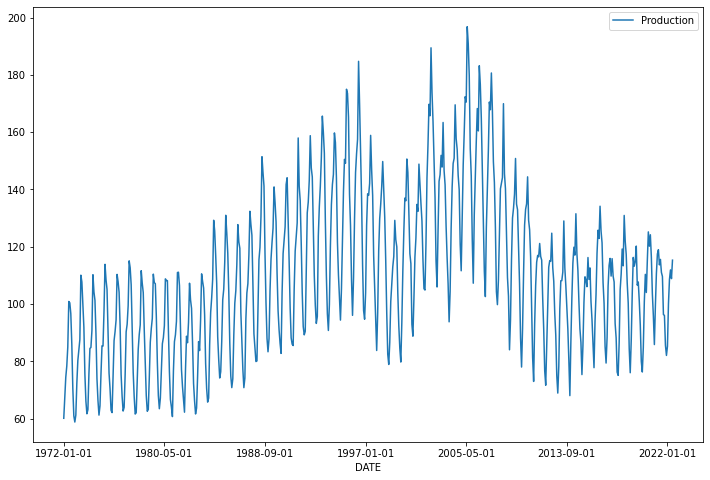

In [116]:
df.plot(figsize=(12,8))

## Train Test Split

In [117]:
len(df)

606

In [118]:
test_size = 24
test_ind = len(df)- test_size

In [119]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [120]:
len(test)

24

## Scale Data

In [121]:
from sklearn.preprocessing import MinMaxScaler

In [122]:
scaler = MinMaxScaler()

In [123]:
scaler.fit(train)

MinMaxScaler()

In [124]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

# Time Series Generator


In [125]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [126]:
length = 18
n_features=1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)

### Creating the Model


In [127]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

In [128]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [129]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [48]:
validation_generator = TimeseriesGenerator(scaled_test,scaled_test, length=length, batch_size=1)

Creating an EarlyStopping callback based on val_loss.

In [130]:
from tensorflow.keras.callbacks import EarlyStopping

In [131]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [132]:
# fit model
model.fit_generator(generator,epochs=20,
                    validation_data=validation_generator,
                   callbacks=[early_stop])

Epoch 1/20
564/564 [==============================] - 2s 4ms/step - loss: 0.0276 - val_loss: 0.0046-  - ETA: 0s - 
Epoch 2/20
564/564 [==============================] - 2s 4ms/step - loss: 0.0099 - val_loss: 0.0011
Epoch 3/20
564/564 [==============================] - 2s 3ms/step - loss: 0.0045 - val_loss: 0.0013
Epoch 4/20
564/564 [==============================] - 2s 4ms/step - loss: 0.0038 - val_loss: 0.0017


**TASK: Plottting the history of the loss that occured during training.**

<AxesSubplot:>

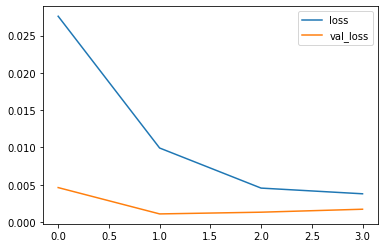

In [133]:
loss = pd.DataFrame(model.history.history)
loss.plot()

## Evaluate on Test Data

In [135]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [136]:
true_predictions = scaler.inverse_transform(test_predictions)

In [137]:
test['Predictions'] = true_predictions

<ipython-input-137-920b79c3c314>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


In [138]:
test

,Production,Predictions
DATE,,
2020-07-01,120.2127,117.745295
2020-08-01,124.2010,109.368607
2020-09-01,116.3215,96.387817
2020-10-01,103.5837,81.373947
2020-11-01,95.8137,69.444934
2020-12-01,85.8814,65.370441
2021-01-01,99.3509,70.131922
2021-02-01,110.6275,81.331937
2021-03-01,117.5007,95.297858


Plotting predictions versus the True test values.

<AxesSubplot:xlabel='DATE'>

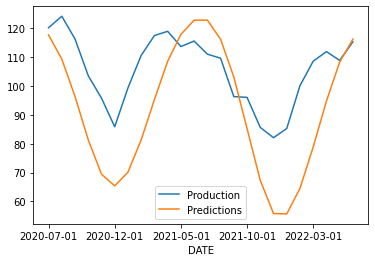

In [139]:
test.plot()

In [140]:
from sklearn.metrics import mean_squared_error

In [141]:
np.sqrt(mean_squared_error(test['Production'],test['Predictions']))

19.70105126863851

In [142]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

Forecast

In [143]:
length = 12 # Length of the output sequences (in number of timesteps)
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length=length, batch_size=1)

In [144]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


# fit model
model.fit_generator(generator,epochs=8)

Epoch 1/8
594/594 [==============================] - 2s 3ms/step - loss: 0.0245
Epoch 2/8
594/594 [==============================] - 2s 3ms/step - loss: 0.0107
Epoch 3/8
594/594 [==============================] - 2s 3ms/step - loss: 0.0067
Epoch 4/8
594/594 [==============================] - 2s 3ms/step - loss: 0.0061
Epoch 5/8
594/594 [==============================] - ETA: 0s - loss: 0.0044- ETA: - 2s 3ms/step - loss: 0.0044
Epoch 6/8
594/594 [==============================] - 2s 3ms/step - loss: 0.0047
Epoch 7/8
594/594 [==============================] - 2s 3ms/step - loss: 0.0046
Epoch 8/8
594/594 [==============================] - 2s 3ms/step - loss: 0.0041


In [145]:
forecast = []
# Replace periods with whatever forecast length you want
periods = 12

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(periods):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    forecast.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [146]:
forecast = scaler.inverse_transform(forecast)

In [147]:
forecast_index = pd.date_range(start='2022-06-01',periods=periods,freq='MS')

In [148]:
forecast_df = pd.DataFrame(data=forecast,index=forecast_index,
                           columns=['Forecast'])

In [149]:
forecast_df

,Forecast
2022-06-01,116.588703
2022-07-01,111.969165
2022-08-01,103.538349
2022-09-01,96.849267
2022-10-01,87.485831
2022-11-01,84.666027
2022-12-01,90.785533
2023-01-01,101.483891
2023-02-01,109.435692
2023-03-01,114.037159


<AxesSubplot:>

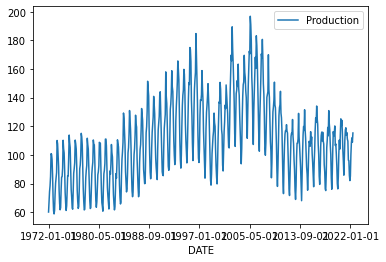

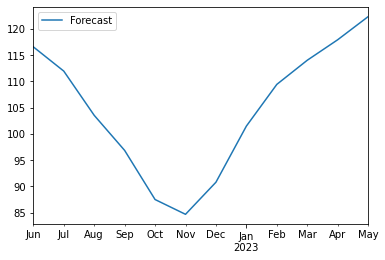

In [150]:
ax = df.plot()
forecast_df.plot()